# AdaBoost - 自适应增强

## 1. 如何理解AdaBoost算法

Boosting是指一类机器学习集成算法，其中先后添加模型，然后序列中的较新模型会校正序列中较早的模型所做的预测。

AdaBoost：自适应增强，是一种增强集成的机器学习算法，并且是最早成功的增强方法之一。

AdaBoost结合了来自短一级决策树（称为决策树桩）的预测。决策树桩算法被用作AdaBoost算法寻求使用许多弱模型并通过添加其他弱模型来校正其预测。

训练算法包括从一个决策树开始，在训练集中找到那些错误分类的示例，并为这些示例增加更多的权重，然后在相同的数据上训练另外一棵树。重复该过程，直到添加了所需数量的树为止。

该算法是为分类而开发的，涉及将集合中所有决策树做出的预测进行组合(多数投票)。还针对回归问题开发了类似的方法，在回归问题中，使用决策树的平均值进行预测。这些决策树对最终预测的贡献度将取决于它们在训练集上的性能。

参考资料：

* [understanding AdaBoost](https://towardsdatascience.com/understanding-adaboost-2f94f22d5bfe)
* [sklearn - AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)
* [adaboost ensemble in python](https://machinelearningmastery.com/adaboost-ensemble-in-python/)

## 2. sklearn实现

### 2.1 分类问题

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

使用iris数据集，根据四种特征预测花的类型。

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["target"] = iris.target

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


调用AdaBoostClassifier接口，实现分类。

In [3]:
# 拆分训练集和检验集
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=123)

# 创建模型对象，使用默认超参数
model = AdaBoostClassifier()

# 拟合数据
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估预测精度
acc = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc: .3f}")

Accuracy:  0.956


使用K折交叉验证评估模型的真实预测能力。

In [4]:
scores = cross_val_score(model, iris.data, iris.target, scoring="accuracy", cv=5, n_jobs=-1)
scores_mean = np.mean(scores)
scores_std = np.std(scores)
print(f"Mean accuracy: {scores_mean:.2f}({scores_std:.2f})")

Mean accuracy: 0.95(0.03)


### 2.2 回归问题

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics

使用boston_housing数据集，预测房屋价格中位数。

In [6]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df["target"] = boston.target

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


调用AdaBoostRegressor接口，建立回归模型。

In [7]:
# 拆分训练集和检验集
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.3, random_state=123)

# 创建模型对象，使用默认超参数
model = AdaBoostRegressor()

# 拟合数据
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估预测精度，MAE（平均绝对误差）
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.3f}")

MAE: 2.844


使用K折交叉验证评估模型的预测能力。

理解scoring参数：cross_val_score的scoring参数指定一个计分器对象，用于评估模型的预测精度，所有计分器对象都遵循一个约定，返回值越高预测精度越高，所以在回归模型中，类似metrics.mean_absolute_error的计分器，可用作'neg_mean_absolute_error'。

所有可选计分器参考：[官方文档](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [8]:
scores = cross_val_score(model, boston.data, boston.target,
                         scoring="neg_mean_absolute_error",
                         cv=5, n_jobs=-1)
scores_mean = np.mean(np.abs(scores))
scores_std = np.std(np.abs(scores))
print(f"Mean MAE: {scores_mean:.2f}({scores_std:.2f})")

Mean MAE: 3.27(0.70)


## 3. 模型优化

在学会使用sklearn实现分类和回归模型后，接下来学习如何优化模型，探索几个重要的超参数对模型表现的影响。

我们会创建虚拟数据集，并使用AdaBoostClassifier分类模型做说明。

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


%matplotlib inline
plt.style.use("ggplot")

In [10]:
# 创建虚拟数据集
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_redundant=10,
    n_classes=2,
    random_state=123
)

### 3.1 决策树的数量

AdaBoost算法的一个重要的超参数是使用的决策树的数量。

集成算法使用的每棵决策树都是弱分类器，每颗决策树都有一定的预测能力，但性能一般。要使集成模型表现良好，添加到模型中的树的数量必须足够多，通常为数百甚至数千。

树的最大数量可以通过"n_estimators"设置，默认为50。

In [11]:
# 探索树的最大数量
n_estimators_list = [5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000]

# 记录给定树数量的预测评分
scores = []

for n_estimators in n_estimators_list:
    model = AdaBoostClassifier(n_estimators=n_estimators)
    cvscores = cross_val_score(
        model, X, y, scoring="accuracy", cv=5, n_jobs=-1)
    scores.append(np.mean(cvscores))

Text(0, 0.5, 'Accuracy')

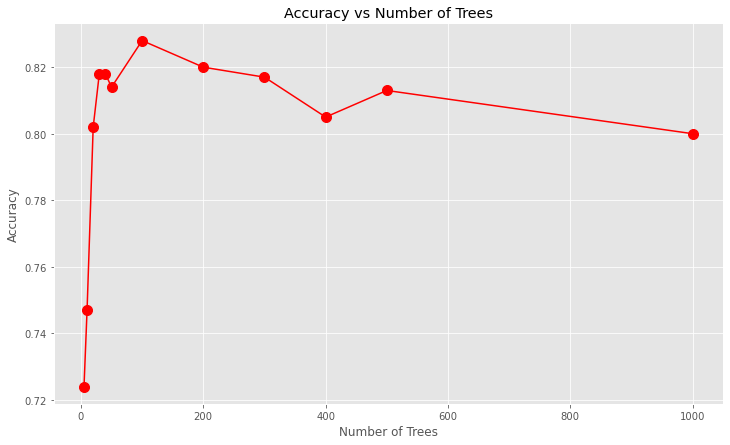

In [12]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(n_estimators_list, scores, "r-o", markersize=10)
ax.set_title("Accuracy vs Number of Trees")
ax.set_xlabel("Number of Trees")
ax.set_ylabel("Accuracy")

当树的数量很少时，预测精度很低，增加数量会迅速提升模型性能，当接近或超过50后，逐渐稳定在一个区间。当树的数量太多，预测精度反而降低，因为模型过度拟合了数据。

### 3.2 决策树的深度

默认情况下，将具有一个级别的决策树用作弱学习器。

通过增加决策树的深度，我们可以使整体中使用的模型不那么脆弱。

以下示例探讨了增加DecisionTreeClassifier的最大深度对AdaBoost集成的影响。

In [13]:
# 决策树的最大深度
depth_list = np.arange(1, 11)

scores = []
for depth in depth_list:
    # 创建基础模型
    base = DecisionTreeClassifier(max_depth=depth)
    # 创建集成分类器
    model = AdaBoostClassifier(base_estimator=base)
    cvscores = cross_val_score(model, X, y, scoring="accuracy", cv=5, n_jobs=-1)
    scores.append(np.mean(cvscores))

Text(0, 0.5, 'Accuracy')

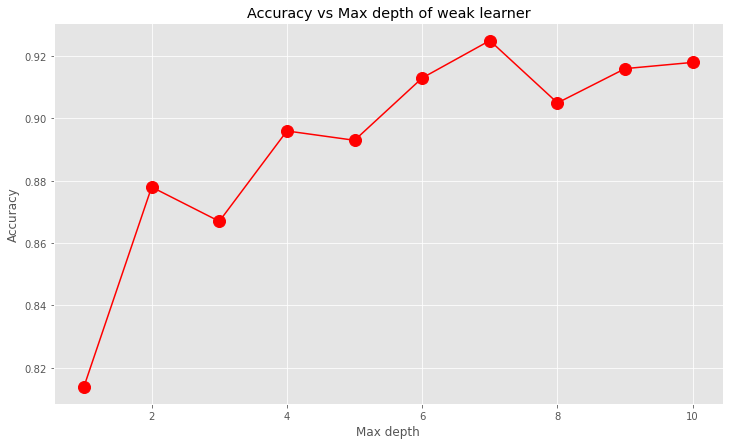

In [14]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(depth_list, scores, "r-o", markersize=12)
ax.set_title("Accuracy vs Max depth of weak learner")
ax.set_xlabel("Max depth")
ax.set_ylabel("Accuracy")

随着作为弱分类器的决策树的最大深度的上升，集成算法的性能也持续上升。

### 3.3 学习率

AdaBoost的一个重要参数是learning_rate(学习率)，控制每棵决策树对整体预测的贡献。

learning_rate默认等于1，根据集成模型使用的决策树数量，较小或较大的值可能是合适的。

集成模型使用的决策树越多，学习率应该越低，相反使用的决策树越少，学习率应该越高。

In [15]:
# 探索学习率对预测精度的影响
learning_rate_list = np.arange(0.1, 2.1, 0.1)

scores = []
for learning_rate in learning_rate_list:
    model = AdaBoostClassifier(learning_rate=learning_rate)
    cvscores = cross_val_score(model, X, y, scoring="accuracy", cv=5, n_jobs=-1)
    scores.append(np.mean(cvscores))

Text(0, 0.5, 'Accuracy')

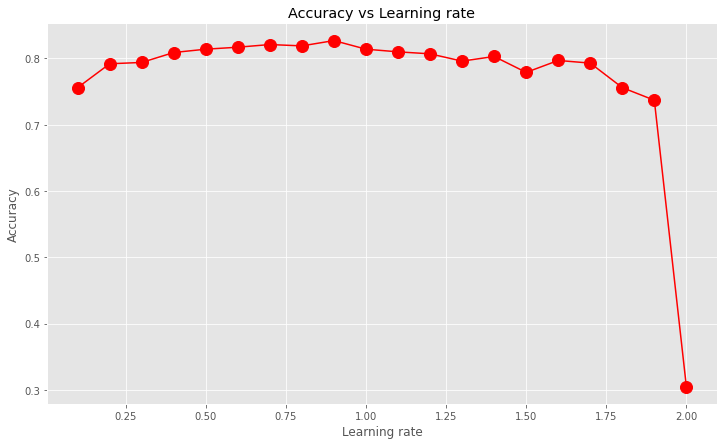

In [16]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(learning_rate_list, scores, "r-o", markersize=12)
ax.set_title("Accuracy vs Learning rate")
ax.set_xlabel("Learning rate")
ax.set_ylabel("Accuracy")

当弱分类器的数量或最大深度等参数保持固定时，学习率在超过默认值1.0后继续增加，会导致预测精度大幅下降。

### 3.4 弱学习器

集成算法默认使用决策树作为弱学习器，但可以使用其它算法，如逻辑回归。

sklearn要求使用的弱学习器必须支持加权样本(weighted samples)，因为AdaBoost通过基于训练集的加权版本拟合模型来创建集合的方式。

参数"base_estimator"指定弱学习器，在分类的情况下，基本模型还必须支持预测概率或类似概率的分数。

接下来使用逻辑回归作为说明。

In [19]:
from sklearn.linear_model import LogisticRegression

model = AdaBoostClassifier(base_estimator=LogisticRegression())
cvscores = cross_val_score(model, X, y, scoring="accuracy", cv=5, n_jobs=-1)
mean_score = np.mean(cvscores)
print(f"Accuracy: {mean_score:.2f}")

Accuracy: 0.79
